In [23]:
import re
import nltk
import spacy
import optuna
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgbm
from kneed import KneeLocator
from powershap import PowerSHAP
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from catboost import CatBoostClassifier
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, silhouette_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix,accuracy_score, roc_auc_score
warnings.filterwarnings("ignore")

In [24]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nlp = spacy.load('pt_core_news_sm')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thayse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Thayse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thayse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
pd.set_option('display.width', 1000)
pd.set_option("display.max_rows", 500)
pd.set_option("display.expand_frame_repr", True)

In [26]:
df=pd.read_csv('base_crm.csv',index_col=0).convert_dtypes()

In [27]:
df.head()

,cod_sessao,id_consumidor,des_titulo,dt_registro,des_origem,des_etiqueta,des_categoria,des_acao,des_nome,des_valor,des_uri
id_sessao,,,,,,,,,,,
96f481ea-9b69-f647-f637-2d2f4ea8816a,0a14c52d-d03e-416f-bfb1-a97c484dfa85,<NA>,INTERACTION,2023-01-01 00:00:00,webstore,cart load,SHOPPING_BAG,pageView,Has-One-Click,False,<NA>
e3d96bc8-5b61-76d2-b24d-079517e1c274,81e85a3c-fe46-4542-b509-feb0056aebf4,<NA>,INTERACTION,2023-01-01 00:00:00,webstore,cart load,SHOPPING_BAG,pageView,Has-One-Click,False,<NA>
173aa064-80e1-e554-9460-f830f5522931,0a14c52d-d03e-416f-bfb1-a97c484dfa85,<NA>,INTERACTION,2023-01-01 00:00:00,webstore,showcase,SHOPPING_BAG,Showcase-View,<NA>,<NA>,<NA>
eb4894bb-5254-e3f2-3717-bd29a65a36ab,0a14c52d-d03e-416f-bfb1-a97c484dfa85,<NA>,INTERACTION,2023-01-01 00:00:00,webstore,cart load,SHOPPING_BAG,pageView,user-login-type,anonymous,<NA>
39b528c2-0679-da52-5afd-fff876a79514,81e85a3c-fe46-4542-b509-feb0056aebf4,<NA>,INTERACTION,2023-01-01 00:00:00,webstore,cart load,SHOPPING_BAG,pageView,user-login-type,logged,<NA>


In [28]:
df['des_uri'].value_counts()

Series([], Name: count, dtype: Int64)

In [30]:
df['des_titulo'].value_counts()

des_titulo
INTERACTION    38438602
Name: count, dtype: Int64

In [31]:
df.describe()

,id_consumidor,des_uri
count,12235600.0,0.0
mean,31404722.415832,<NA>
std,10682003.685253,<NA>
min,12194800.0,<NA>
25%,19368980.0,<NA>
50%,36050919.0,<NA>
75%,41310401.0,<NA>
max,41860182.0,<NA>


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38438602 entries, 96f481ea-9b69-f647-f637-2d2f4ea8816a to 997f158b-6fd0-dbff-8fd3-cd30fa64005e
Data columns (total 11 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   cod_sessao     string
 1   id_consumidor  Int64 
 2   des_titulo     string
 3   dt_registro    string
 4   des_origem     string
 5   des_etiqueta   string
 6   des_categoria  string
 7   des_acao       string
 8   des_nome       string
 9   des_valor      string
 10  des_uri        Int64 
dtypes: Int64(2), string(9)
memory usage: 4.5+ GB


In [33]:
colunas=df.columns.unique()
colunas

Index(['cod_sessao', 'id_consumidor', 'des_titulo', 'dt_registro', 'des_origem', 'des_etiqueta', 'des_categoria', 'des_acao', 'des_nome', 'des_valor', 'des_uri'], dtype='object')

In [34]:
variaveis=['des_etiqueta', 'des_categoria', 'des_acao', 'des_nome', 'des_valor']

In [35]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Limpeza e normalização de texto
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenização e conversão para minúsculas
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thayse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thayse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Thayse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
#'cod_sessao', 'id_consumidor',
data=df.groupby(variaveis).size().reset_index()
data=data.rename(columns={0: 'contagem'})
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362560 entries, 0 to 362559
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   des_etiqueta   362560 non-null  string
 1   des_categoria  362560 non-null  string
 2   des_acao       362560 non-null  string
 3   des_nome       362560 non-null  string
 4   des_valor      362560 non-null  string
 5   contagem       362560 non-null  int64 
dtypes: int64(1), string(5)
memory usage: 16.6 MB


,des_etiqueta,des_categoria,des_acao,des_nome,des_valor,contagem
0,403 FORBIDDEN,PAYMENT,Server-Response,message,invalid request json_ Access is denied,21
1,500 INTERNAL_SERVER_ERROR,ADDRESS,Server-Response,message,invalid request json_ 500 Internal Server Erro...,6
2,500 INTERNAL_SERVER_ERROR,ADDRESS,Server-Response,message,invalid request json_ JSON decoding error_ Ins...,2
3,500 INTERNAL_SERVER_ERROR,PAYMENT,Server-Response,message,invalid request json_ 403 Forbidden_ [no body],1
4,500 INTERNAL_SERVER_ERROR,PAYMENT,Server-Response,message,invalid request json_ 500 Internal Server Erro...,6
...,...,...,...,...,...,...
362555,upvoteReview,PRODUCTS,Link-Click,slugName,zaad-mondo-eau-de-parfum-95ml,2
362556,upvoteReview,PRODUCTS,Link-Click,slugName,zaad-santal-desodorante-colonia-splash-200ml,1
362557,upvoteReview,PRODUCTS,Link-Click,slugName,zaad-santal-eau-de-parfum-95ml,3
362558,whatsappNews,register,Field-Blur,length,0,33489


In [11]:
#tratar uf;

def clean_action(action):
    return re.sub(r'\d+$', '', action)

for item in variaveis:
    data['pp_'+item] = data[item].apply(preprocess_text)
    data['cpp_'+item] = data['pp_'+item].apply(clean_action)

data['cpp_des_etiqueta'].value_counts()

cpp_des_etiqueta
                         136122
address load              62023
search                    57656
result                    35094
success load              21435
categoria                   744
credit                      676
marcas                      560
coffrets                    536
upvotereview                302
linhas da marca             185
datasheet attribute         120
password                    118
email                        90
downvotereview               70
postalcode                   64
departamento                 53
holdername                   42
volume                       38
tipos de cabelo              37
tipos                        36
propriedades                 32
datasheet subcategory        28
olfativa                     27
tipo de pele                 26
datasheet category           23
cor                          21
telephone                    20
payment load                 15
cvc                          14
itens                  

In [12]:
data

,des_etiqueta,des_categoria,des_acao,des_nome,des_valor,contagem,pp_des_etiqueta,cpp_des_etiqueta,pp_des_categoria,cpp_des_categoria,pp_des_acao,cpp_des_acao,pp_des_nome,cpp_des_nome,pp_des_valor,cpp_des_valor
0,403 FORBIDDEN,PAYMENT,Server-Response,message,invalid request json_ Access is denied,17,403 forbidden,403 forbidden,payment,payment,,,message,message,invalid request access denied,invalid request access denied
1,500 INTERNAL_SERVER_ERROR,ADDRESS,Server-Response,message,invalid request json_ 500 Internal Server Erro...,6,500,,address,address,,,message,message,invalid request 500 internal server error post,invalid request 500 internal server error post
2,500 INTERNAL_SERVER_ERROR,ADDRESS,Server-Response,message,invalid request json_ JSON decoding error_ Ins...,2,500,,address,address,,,message,message,invalid request json decoding instantiation si...,invalid request json decoding instantiation si...
3,500 INTERNAL_SERVER_ERROR,PAYMENT,Server-Response,message,invalid request json_ 403 Forbidden_ [no body],1,500,,payment,payment,,,message,message,invalid request 403 body,invalid request 403 body
4,500 INTERNAL_SERVER_ERROR,PAYMENT,Server-Response,message,invalid request json_ 500 Internal Server Erro...,6,500,,payment,payment,,,message,message,invalid request 500 internal server error post,invalid request 500 internal server error post
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316329,upvoteReview,PRODUCTS,Link-Click,slugName,zaad-expedition-eau-de-parfum-95ml,5,upvotereview,upvotereview,product,product,,,slugname,slugname,,
316330,upvoteReview,PRODUCTS,Link-Click,slugName,zaad-go-eau-de-parfum-95ml,1,upvotereview,upvotereview,product,product,,,slugname,slugname,,
316331,upvoteReview,PRODUCTS,Link-Click,slugName,zaad-santal-desodorante-colonia-splash-200ml,1,upvotereview,upvotereview,product,product,,,slugname,slugname,,
316332,whatsappNews,register,Field-Blur,length,0,400,whatsappnews,whatsappnews,register,register,,,length,length,0,


In [13]:
df.info()

#ID_CONSUMIDOR vem do fingerprint

<class 'pandas.core.frame.DataFrame'>
Index: 6137499 entries, 13 to 38438589
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   id_sessao      string
 1   cod_sessao     string
 2   id_consumidor  Int64 
 3   dt_registro    string
 4   des_origem     string
 5   des_etiqueta   string
 6   des_categoria  string
 7   des_acao       string
 8   des_nome       string
 9   des_valor      string
dtypes: Int64(1), string(9)
memory usage: 520.9 MB


In [14]:
#'cod_sessao', 'id_consumidor',
variaveis=['cpp_des_etiqueta', 'cpp_des_categoria', 'cpp_des_acao', 'cpp_des_nome', 'cpp_des_valor']
data=data.groupby(variaveis).size().reset_index()
data=data.rename(columns={0: 'contagem'})
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49671 entries, 0 to 49670
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cpp_des_etiqueta   49671 non-null  object
 1   cpp_des_categoria  49671 non-null  object
 2   cpp_des_acao       49671 non-null  object
 3   cpp_des_nome       49671 non-null  object
 4   cpp_des_valor      49671 non-null  object
 5   contagem           49671 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


,cpp_des_etiqueta,cpp_des_categoria,cpp_des_acao,cpp_des_nome,cpp_des_valor,contagem
0,,,,c,,5
1,,,,email,,62
2,,,,email,agomesferreira,1
3,,,,email,aguinaldoasilva,1
4,,,,email,aldeniselino,1
...,...,...,...,...,...,...
49666,volume,search,,valor,30ml,1
49667,volume,search,,valor,50ml 100ml,1
49668,volume,search,,valor,acima de 200ml,1
49669,volume,zaadperfumaria,,valor,50ml 100ml,1


In [15]:
data=data.sort_values(by='contagem',ascending=False)
data

,cpp_des_etiqueta,cpp_des_categoria,cpp_des_acao,cpp_des_nome,cpp_des_valor,contagem
2341,,address,,postalcode,,88502
18456,address load,address,pageview,,,62021
49548,search,address,,postalcode,,57656
49559,success load,confirmation,pageview,tiket,,21407
322,,,,sku,b,9305
...,...,...,...,...,...,...
18781,categoria,perfumariafeminino,,valor,masculino,1
18782,categoria,perfumariafeminino,,valor,oriental,1
18783,categoria,perfumariafeminino,,valor,unissex,1
1500,,,notification,message,produto facial antioleosidade capricho hello s...,1


In [16]:
db=data[variaveis]

In [17]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(db)

In [18]:
X

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lematizar(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

for item in variaveis:
    data[item + '_tokens'] = data[item].apply(word_tokenize)
    
    data[item + '_lemmas'] = data[item + '_tokens'].apply(lematizar)
    
    print(data[[item, item + '_lemmas']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thayse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Thayse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


      cpp_des_etiqueta cpp_des_etiqueta_lemmas
2341                                        []
18456     address load         [address, load]
49548           search                [search]
49559     success load         [success, load]
322                                         []
      cpp_des_categoria cpp_des_categoria_lemmas
2341            address                [address]
18456           address                [address]
49548           address                [address]
49559      confirmation           [confirmation]
322                                           []
      cpp_des_acao cpp_des_acao_lemmas
2341                                []
18456     pageview          [pageview]
49548                               []
49559     pageview          [pageview]
322                                 []
      cpp_des_nome cpp_des_nome_lemmas
2341    postalcode        [postalcode]
18456                               []
49548   postalcode        [postalcode]
49559        tiket             [ti

In [20]:
data

,cpp_des_etiqueta,cpp_des_categoria,cpp_des_acao,cpp_des_nome,cpp_des_valor,contagem,cpp_des_etiqueta_tokens,cpp_des_etiqueta_lemmas,cpp_des_categoria_tokens,cpp_des_categoria_lemmas,cpp_des_acao_tokens,cpp_des_acao_lemmas,cpp_des_nome_tokens,cpp_des_nome_lemmas,cpp_des_valor_tokens,cpp_des_valor_lemmas
2341,,address,,postalcode,,88502,[],[],[address],[address],[],[],[postalcode],[postalcode],[],[]
18456,address load,address,pageview,,,62021,"[address, load]","[address, load]",[address],[address],[pageview],[pageview],[],[],[],[]
49548,search,address,,postalcode,,57656,[search],[search],[address],[address],[],[],[postalcode],[postalcode],[],[]
49559,success load,confirmation,pageview,tiket,,21407,"[success, load]","[success, load]",[confirmation],[confirmation],[pageview],[pageview],[tiket],[tiket],[],[]
322,,,,sku,b,9305,[],[],[],[],[],[],[sku],[sku],[b],[b]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18781,categoria,perfumariafeminino,,valor,masculino,1,[categoria],[categoria],[perfumariafeminino],[perfumariafeminino],[],[],[valor],[valor],[masculino],[masculino]
18782,categoria,perfumariafeminino,,valor,oriental,1,[categoria],[categoria],[perfumariafeminino],[perfumariafeminino],[],[],[valor],[valor],[oriental],[oriental]
18783,categoria,perfumariafeminino,,valor,unissex,1,[categoria],[categoria],[perfumariafeminino],[perfumariafeminino],[],[],[valor],[valor],[unissex],[unissex]
1500,,,notification,message,produto facial antioleosidade capricho hello s...,1,[],[],[],[],[notification],[notification],[message],[message],"[produto, facial, antioleosidade, capricho, he...","[produto, facial, antioleosidade, capricho, he..."


In [21]:
data.columns.to_list()

['cpp_des_etiqueta',
 'cpp_des_categoria',
 'cpp_des_acao',
 'cpp_des_nome',
 'cpp_des_valor',
 'contagem',
 'cpp_des_etiqueta_tokens',
 'cpp_des_etiqueta_lemmas',
 'cpp_des_categoria_tokens',
 'cpp_des_categoria_lemmas',
 'cpp_des_acao_tokens',
 'cpp_des_acao_lemmas',
 'cpp_des_nome_tokens',
 'cpp_des_nome_lemmas',
 'cpp_des_valor_tokens',
 'cpp_des_valor_lemmas']

In [22]:
data['cleaned_des_origem_tokens'].value_counts()

KeyError: 'cleaned_des_origem_tokens'

In [ ]:
data['cleaned_des_acao_tokens'].value_counts(normalize=True)*100

cleaned_des_acao_tokens
[Postal-Address]                                                                                62.871424
[Input-End-Editing]                                                                             15.816505
[Server-Response]                                                                                5.778674
[Link-Click]                                                                                     3.622789
[notification]                                                                                   3.066593
[Button-Click]                                                                                   2.710828
[Filter-Click]                                                                                   2.620634
[pageView]                                                                                       1.168763
[icon-bag-full]                                                                                  0.348249
[btn, btn-outline-seco

In [ ]:
data['cleaned_des_categoria_tokens'].value_counts(normalize=True)*100

cleaned_des_categoria_tokens
[ADDRESS]                                                 79.680062
[PRODUCTS]                                                 5.141053
[aplicar-cupom_checkout, -, sacola, -, mobile]             3.134239
[SHOPPING_BAG]                                             2.618129
[aplicar-cupom_checkout, -, payment-screen, -, mobile]     2.108283
                                                            ...    
[MATCHSCIENCE-RECONSTRUCAO]                                0.001253
[MEUS-TONS-DE-BOTI]                                        0.001253
[MEUS-TONS-DE-BOTICLARO]                                   0.001253
[PRESENTES-DE-NATALCARTAO]                                 0.001253
[GLAMOURJUST-SHINE]                                        0.001253
Name: proportion, Length: 615, dtype: float64

In [ ]:
data['cleaned_des_etiqueta_tokens'].value_counts()

cleaned_des_etiqueta_tokens
[Result]                                          34410
[Search]                                          15779
[New-Address-streetAddress]                       11787
[Failure-Coupon]                                   4233
[TOAST_WARNING]                                    3199
[reviews-load-more]                                1343
[Bought-Together]                                  1121
[success, load]                                     893
[Register-Newsletter]                               861
[Edit-Address-streetAddress]                        830
[Categoria]                                         744
[play-video]                                        581
[Marcas]                                            560
[TOAST_DANGER]                                      373
[Product-Brand-See-More]                            305
[upvoteReview]                                      302
[WhatsApp-Viewed]                                   221
[Success-Coupon]    

In [ ]:
 #(& (~data['des_nome'].str.contains('postalcode'))
filtro = data[data['contagem'] > 100000]
filtro

,cleaned_des_origem,cleaned_des_etiqueta,cleaned_des_categoria,cleaned_des_acao,cleaned_des_nome,cleaned_des_valor,contagem,cleaned_des_origem_tokens,cleaned_des_origem_lemmas,cleaned_des_etiqueta_tokens,cleaned_des_etiqueta_lemmas,cleaned_des_categoria_tokens,cleaned_des_categoria_lemmas,cleaned_des_acao_tokens,cleaned_des_acao_lemmas,cleaned_des_nome_tokens,cleaned_des_nome_lemmas,cleaned_des_valor_tokens,cleaned_des_valor_lemmas
76272,webstore,cart load,SHOPPING_BAG,pageView,Has-One-Click,False,387371,[webstore],[webstore],"[cart, load]","[cart, load]",[SHOPPING_BAG],[SHOPPING_BAG],[pageView],[pageView],[Has-One-Click],[Has-One-Click],[False],[False]
76169,webstore,WhatsApp-Viewed,HOME,Item-View,version,v,321863,[webstore],[webstore],[WhatsApp-Viewed],[WhatsApp-Viewed],[HOME],[HOME],[Item-View],[Item-View],[version],[version],[v],[v]
76275,webstore,cart load,SHOPPING_BAG,pageView,user-login-type,logged,289615,[webstore],[webstore],"[cart, load]","[cart, load]",[SHOPPING_BAG],[SHOPPING_BAG],[pageView],[pageView],[user-login-type],[user-login-type],[logged],[logged]
76642,webstore,payment load,PAYMENT,pageView,Has-Express-Shipping,False,255253,[webstore],[webstore],"[payment, load]","[payment, load]",[PAYMENT],[PAYMENT],[pageView],[pageView],[Has-Express-Shipping],[Has-Express-Shipping],[False],[False]
76643,webstore,payment load,PAYMENT,pageView,Has-Super-Express-Shipping,False,253921,[webstore],[webstore],"[payment, load]","[payment, load]",[PAYMENT],[PAYMENT],[pageView],[pageView],[Has-Super-Express-Shipping],[Has-Super-Express-Shipping],[False],[False]
76640,webstore,payment load,PAYMENT,pageView,Has-ClickAndCollect-Shipping,False,230915,[webstore],[webstore],"[payment, load]","[payment, load]",[PAYMENT],[PAYMENT],[pageView],[pageView],[Has-ClickAndCollect-Shipping],[Has-ClickAndCollect-Shipping],[False],[False]
2077,webstore,Choose-Address,ADDRESS,Button-Click,postalCode,,217294,[webstore],[webstore],[Choose-Address],[Choose-Address],[ADDRESS],[ADDRESS],[Button-Click],[Button-Click],[postalCode],[postalCode],[],[]
76248,webstore,address load,ADDRESS,pageView,has-shipping,,206953,[webstore],[webstore],"[address, load]","[address, load]",[ADDRESS],[ADDRESS],[pageView],[pageView],[has-shipping],[has-shipping],[],[]
76639,webstore,payment load,PAYMENT,pageView,Card-Info,nothing-saved,201198,[webstore],[webstore],"[payment, load]","[payment, load]",[PAYMENT],[PAYMENT],[pageView],[pageView],[Card-Info],[Card-Info],[nothing-saved],[nothing-saved]
76250,webstore,address load,ADDRESS,pageView,user-login-type,logged,199468,[webstore],[webstore],"[address, load]","[address, load]",[ADDRESS],[ADDRESS],[pageView],[pageView],[user-login-type],[user-login-type],[logged],[logged]


In [ ]:
# import requests
# def buscar_cep(cep):
#     url = f'https://viacep.com.br/ws/{cep}/json/'
#     response = requests.get(url)
#     if response.status_code == 200:
#         data = response.json()
#         if "erro" not in data:
#             return data
#         else:
#             return None  # CEP não encontrado
#     else:
#         return None  # Falha na requisição
# # Suponha que seu DataFrame seja algo como:
# # cep = pd.DataFrame({
# #     'zipcode': ['01001-000', '02020-000', '00000-000']  # Alguns CEPs de exemplo
# # })

# # Criar novas colunas baseadas nas informações retornadas pela API
# def expandir_info(row):
#     info = buscar_cep(row['zipcode'])
#     if info:
#         return pd.Series({
#             'logradouro': info.get('logradouro', ''),
#             'bairro': info.get('bairro', ''),
#             'localidade': info.get('localidade', ''),
#             'uf': info.get('uf', ''),
#             'cep': info.get('cep', '')
#         })
#     else:
#         return pd.Series({
#             'logradouro': None,
#             'bairro': None,
#             'localidade': None,
#             'uf': None,
#             'cep': None
#         })

# # Aplicar a função ao DataFrame e unir os resultados como novas colunas
# cep_info = cep.apply(expandir_info, axis=1)
# cep = pd.concat([cep, cep_info], axis=1)


In [ ]:
df_consumidor_count=df.groupby(['id_consumidor','cod_sessao','des_origem']).size().reset_index()
df_consumidor_count

,id_consumidor,cod_sessao,des_origem,0
0,12251748,93a53008-a27f-4f6f-ab88-438efddd5fb5,webstore,1
1,12251786,50a486d9-75d1-4c0e-b085-e5c56a8afc08,account-webstore,4
2,12251786,50a486d9-75d1-4c0e-b085-e5c56a8afc08,webstore,40
3,12251799,46484de6-d015-43fe-96e7-683134211398,webstore,12
4,12251799,cd358311-c839-4e26-a40f-de47ac280383,webstore,22
...,...,...,...,...
485203,41860148,96e0bac1-7b46-4b3f-998f-1ca480288995,webstore,18
485204,41860170,e00a6c56-5a6c-4241-b201-1cac834d1e28,webstore,3
485205,41860172,15ef7563-f46d-4935-81dc-b32705669615,webstore,9
485206,41860177,9462fb7a-4e13-423b-9331-2fd14c3098dc,webstore,1


In [ ]:
df_consumidor=df.groupby(['id_consumidor','cod_sessao']).agg({'dt_registro':[np.min, np.max]}).reset_index()

df_consumidor.columns.map('_'.join)

df_consumidor

id_consumidor                            cod_sessao          dt_registro                     
                                                                            min                  max
0           12251748  93a53008-a27f-4f6f-ab88-438efddd5fb5  2023-01-17 12:31:12  2023-01-17 12:31:12
1           12251786  50a486d9-75d1-4c0e-b085-e5c56a8afc08  2023-01-14 15:46:31  2023-01-14 15:58:25
2           12251799  46484de6-d015-43fe-96e7-683134211398  2023-01-31 06:04:23  2023-01-31 06:07:45
3           12251799  cd358311-c839-4e26-a40f-de47ac280383  2023-01-20 09:19:54  2023-01-20 09:23:44
4           12252204  fcf59c2b-4dfb-42cb-8dde-081b133cbaff  2023-01-30 22:58:01  2023-01-30 23:04:44
...              ...                                   ...                  ...                  ...
472873      41860148  96e0bac1-7b46-4b3f-998f-1ca480288995  2023-01-31 23:56:52  2023-01-31 23:57:54
472874      41860170  e00a6c56-5a6c-4241-b201-1cac834d1e28  2023-01-31 23:58:47  2023-01-31 23:59:34
472875      41860172  15ef7563-f46d-4935-81dc-b32705669615  2023-01-31 23:58:53  2023-01-31 23:59:27
472876      41860177  9462fb7a-4e13-423b-9331-2fd14c3098dc  2023-01-31 23:59:10  2023-01-31 23:59:10
472877      41860182  9fc45827-9ae5-45b1-b6dc-8cb1cfd49a55  2023-01-31 23:59:20  2023-01-31 23:59:20

[472878 rows x 4 columns]

In [ ]:
consumidor = pd.concat([df_consumidor_count,df_consumidor],axis=1)
consumidor

,id_consumidor,cod_sessao,des_origem,0,"(id_consumidor, )","(cod_sessao, )","(dt_registro, min)","(dt_registro, max)"
0,12251748,93a53008-a27f-4f6f-ab88-438efddd5fb5,webstore,1,12251748,93a53008-a27f-4f6f-ab88-438efddd5fb5,2023-01-17 12:31:12,2023-01-17 12:31:12
1,12251786,50a486d9-75d1-4c0e-b085-e5c56a8afc08,account-webstore,4,12251786,50a486d9-75d1-4c0e-b085-e5c56a8afc08,2023-01-14 15:46:31,2023-01-14 15:58:25
2,12251786,50a486d9-75d1-4c0e-b085-e5c56a8afc08,webstore,40,12251799,46484de6-d015-43fe-96e7-683134211398,2023-01-31 06:04:23,2023-01-31 06:07:45
3,12251799,46484de6-d015-43fe-96e7-683134211398,webstore,12,12251799,cd358311-c839-4e26-a40f-de47ac280383,2023-01-20 09:19:54,2023-01-20 09:23:44
4,12251799,cd358311-c839-4e26-a40f-de47ac280383,webstore,22,12252204,fcf59c2b-4dfb-42cb-8dde-081b133cbaff,2023-01-30 22:58:01,2023-01-30 23:04:44
...,...,...,...,...,...,...,...,...
485203,41860148,96e0bac1-7b46-4b3f-998f-1ca480288995,webstore,18,<NA>,<NA>,<NA>,<NA>
485204,41860170,e00a6c56-5a6c-4241-b201-1cac834d1e28,webstore,3,<NA>,<NA>,<NA>,<NA>
485205,41860172,15ef7563-f46d-4935-81dc-b32705669615,webstore,9,<NA>,<NA>,<NA>,<NA>
485206,41860177,9462fb7a-4e13-423b-9331-2fd14c3098dc,webstore,1,<NA>,<NA>,<NA>,<NA>


In [ ]:
consumidor.columns.to_list()

['id_consumidor',
 'cod_sessao',
 'des_origem',
 0,
 ('id_consumidor', ''),
 ('cod_sessao', ''),
 ('dt_registro', 'min'),
 ('dt_registro', 'max')]

In [ ]:
d = dict(zip([ 0, ('dt_registro', 'min'), ('dt_registro', 'max')], ["contagem", "dt_min", "dt_max"]))
print (d)

{0: 'contagem', ('dt_registro', 'min'): 'dt_min', ('dt_registro', 'max'): 'dt_max'}


In [ ]:
consumidor=consumidor.rename(columns=d)
consumidor

,id_consumidor,cod_sessao,des_origem,contagem,"(id_consumidor, )","(cod_sessao, )",dt_min,dt_max
0,12251748,93a53008-a27f-4f6f-ab88-438efddd5fb5,webstore,1,12251748,93a53008-a27f-4f6f-ab88-438efddd5fb5,2023-01-17 12:31:12,2023-01-17 12:31:12
1,12251786,50a486d9-75d1-4c0e-b085-e5c56a8afc08,account-webstore,4,12251786,50a486d9-75d1-4c0e-b085-e5c56a8afc08,2023-01-14 15:46:31,2023-01-14 15:58:25
2,12251786,50a486d9-75d1-4c0e-b085-e5c56a8afc08,webstore,40,12251799,46484de6-d015-43fe-96e7-683134211398,2023-01-31 06:04:23,2023-01-31 06:07:45
3,12251799,46484de6-d015-43fe-96e7-683134211398,webstore,12,12251799,cd358311-c839-4e26-a40f-de47ac280383,2023-01-20 09:19:54,2023-01-20 09:23:44
4,12251799,cd358311-c839-4e26-a40f-de47ac280383,webstore,22,12252204,fcf59c2b-4dfb-42cb-8dde-081b133cbaff,2023-01-30 22:58:01,2023-01-30 23:04:44
...,...,...,...,...,...,...,...,...
485203,41860148,96e0bac1-7b46-4b3f-998f-1ca480288995,webstore,18,<NA>,<NA>,<NA>,<NA>
485204,41860170,e00a6c56-5a6c-4241-b201-1cac834d1e28,webstore,3,<NA>,<NA>,<NA>,<NA>
485205,41860172,15ef7563-f46d-4935-81dc-b32705669615,webstore,9,<NA>,<NA>,<NA>,<NA>
485206,41860177,9462fb7a-4e13-423b-9331-2fd14c3098dc,webstore,1,<NA>,<NA>,<NA>,<NA>


In [ ]:
consumidor=consumidor.drop(columns=[('id_consumidor', ''),
 ('cod_sessao', '')])
consumidor

,id_consumidor,cod_sessao,des_origem,contagem,dt_min,dt_max
0,12251748,93a53008-a27f-4f6f-ab88-438efddd5fb5,webstore,1,2023-01-17 12:31:12,2023-01-17 12:31:12
1,12251786,50a486d9-75d1-4c0e-b085-e5c56a8afc08,account-webstore,4,2023-01-14 15:46:31,2023-01-14 15:58:25
2,12251786,50a486d9-75d1-4c0e-b085-e5c56a8afc08,webstore,40,2023-01-31 06:04:23,2023-01-31 06:07:45
3,12251799,46484de6-d015-43fe-96e7-683134211398,webstore,12,2023-01-20 09:19:54,2023-01-20 09:23:44
4,12251799,cd358311-c839-4e26-a40f-de47ac280383,webstore,22,2023-01-30 22:58:01,2023-01-30 23:04:44
...,...,...,...,...,...,...
485203,41860148,96e0bac1-7b46-4b3f-998f-1ca480288995,webstore,18,<NA>,<NA>
485204,41860170,e00a6c56-5a6c-4241-b201-1cac834d1e28,webstore,3,<NA>,<NA>
485205,41860172,15ef7563-f46d-4935-81dc-b32705669615,webstore,9,<NA>,<NA>
485206,41860177,9462fb7a-4e13-423b-9331-2fd14c3098dc,webstore,1,<NA>,<NA>


In [ ]:
print(df['des_etiqueta'].value_counts().to_dict())

# variável descreve a ação do cliente no site

{'payment load': 1276269, 'cart load': 842587, 'address load': 575016, 'WhatsApp-Viewed': 453027, 'success load': 349219, 'addressType': 218042, 'Choose-Address': 217294, 'Call-To-Action-Buy': 162112, 'Failure-Coupon': 98632, 'Search': 86913, 'New-Address-postalCode': 86007, 'CANT_FIND_ANY_DELIVERY_OPTIONS': 80939, 'Remove-Product': 80582, 'Apply-Product-Removal': 76222, 'Stored-Card-cvc': 74942, 'Result': 71067, 'New-Card-cardNumber': 68574, 'New-Address-addressType': 67141, 'New-Card-installment': 65664, 'New-Address-number': 61065, 'New-Address-givenName': 53457, 'TOAST_DANGER': 51610, 'password': 50734, 'New-Address-label': 49918, 'postalCode': 48335, 'MEMBER_NOT_FOUND': 48123, 'New-Card-cvc': 38306, 'Open-Loyalty-Discount-Modal': 36013, 'TOAST_WARNING': 34131, 'New-Address-complement': 33385, 'New-Address-district': 29734, 'OptWhatsApp': 29275, 'New-Address-streetAddress': 28296, 'email': 27218, 'COUPON_NOT_APPLICABLE': 26479, 'Set-Quantity-1': 24714, 'Group-Item': 23505, 'TOAST_S

In [ ]:
print(df['des_acao'].value_counts().to_dict())

{'pageView': 3151118, 'Field-Click': 501320, 'Button-Click': 500547, 'Item-View': 453027, 'Server-Response': 294993, 'Field-Blur': 247861, 'Link-Click': 214148, 'Select-Click': 190771, 'Postal-Address': 157980, 'Field-Change': 137488, 'Input-End-Editing': 91079, 'Checkbox-Click': 77485, 'handleError': 41851, 'notification': 14236, 'Filter-Click': 10766, 'icon-bag-full': 8468, 'updateAddress': 6526, 'btn btn-outline-secondary btn-lg btn-block js-notify-me-btn': 5279, 'cart-summary-quantity': 4905, 'getShippingOptions': 4598, 'product-wish-list-icon ls-is-cached lazyloaded': 2946, 'btn btn-primary btn-block btn-sm js-add-to-cart': 2257, 'btn btn-outline-secondary btn-bolder btn-load-more js-load-more m-a lazyloaded': 2210, 'btn btn-primary js-review-form-submit g-recaptcha': 2103, 'btn btn-outline-secondary footer-newsletter-input js-newsletter-btn js-btn-footer': 1972, 'product-wish-list-icon lazyloaded': 1835, 'addWishList': 1550, 'recalculate': 1288, 'getFidelity': 1159, 'handleError_

In [ ]:
print(df['des_nome'].value_counts().to_dict())

{'user-login-type': 1089341, 'version': 480230, 'Has-One-Click': 421294, '0error': 399710, 'message': 332252, 'length': 329808, 'postalCode': 304207, 'sku': 271591, 'Has-ClickAndCollect-Shipping': 255254, 'Has-Super-Express-Shipping': 255254, 'Card-Info': 255254, 'Has-Express-Shipping': 255253, 'has-shipping': 249374, 'error': 223514, 'skus': 177074, 'urgency-trigger': 108027, 'Items': 87153, 'Tiket': 87152, 'shippingType': 87146, 'streetAddress': 83547, 'installments': 80113, 'checked': 77485, 'cupom': 70496, 'addressType': 67717, 'Reason': 36013, 'slugName': 14717, 'variant': 14102, 'valor': 10766, 'C0004': 4061, 'videoName': 2939, 'orderStatus': 2877, 'giftable': 1132, 'email': 966, 'oneClick': 308, 'oneClickSender': 308, 'attribute': 263, 'showcaseType': 246, 'showcaseTitle': 246, 'category': 167, 'department': 66, 'subcategory': 64, 'C0003': 12}


In [ ]:
df['btn']=df['des_acao'].str.contains('btn')
df['btn'].value_counts()

btn
False    6123245
True       14254
Name: count, dtype: Int64

In [ ]:
df['cupom'] = df['des_categoria'].str.contains('cupom|CUPOM|PROMOCAO|BRINDE|brinde')
df['cupom'].value_counts()

cupom
False    6015616
True      121883
Name: count, dtype: Int64

In [ ]:
df['versao_produto']=df['des_valor'].str.contains('v1')
df['versao_produto'].value_counts()

versao_produto
False    5657257
True      480242
Name: count, dtype: Int64

In [ ]:
df['erro']=df['des_valor'].str.contains('Ops!')
df['erro'].value_counts()

erro
False    6112733
True       24766
Name: count, dtype: Int64

In [ ]:
df['nome_produto']=df['des_nome'].str.contains('valor')
df['nome_produto'].value_counts()

nome_produto
False    6126733
True       10766
Name: count, dtype: Int64

In [ ]:
df['perfumaria'] = df['des_categoria'].str.contains('COFFEE|PERFUMARIA|perfumaria|MAQUIAGEM|maquiagem|CABELOS|cabelos|CUIDE|BANHO|lily|LILY|cuidados|CUIDADOS|BOTI|CAPILAR')
df['perfumaria'].value_counts()

perfumaria
False    5989214
True      148285
Name: count, dtype: Int64

In [ ]:
df['procedimento'] = np.where(df['versao_produto']==True,'produto', df['des_categoria'])
df['procedimento'] = np.where(df['btn']==True,'produto', df['procedimento'])
df['procedimento'] = np.where(df['perfumaria']==True,'produto', df['procedimento'])
df['procedimento'] = np.where(df['btn']==True,'produto', df['procedimento'])
df['procedimento'] = np.where(df['nome_produto']==True,'produto', df['procedimento'])
df['procedimento'] = np.where(df['erro']==True,'erro', df['procedimento'])
df['procedimento'] = np.where(df['cupom']==True,'cupom', df['procedimento'])
df['procedimento'] = np.where(df['procedimento'].notna(), df['procedimento'].str.upper(), np.nan)
len(df['procedimento'].value_counts())


70

In [ ]:
lista=df.groupby(['procedimento']).size().reset_index()


In [ ]:
lista=lista.rename(columns={0:'contagem'})
lista=lista.sort_values(by='contagem')
lista['variaveis_finais'] = np.where(lista['contagem']<100, 'PRODUTO', lista['procedimento'])
lista

,procedimento,contagem,variaveis_finais
0,ACCORDES,1,PRODUTO
66,SOPHIE,1,PRODUTO
54,PRESENTES-DE-NATAL,1,PRODUTO
48,NETFLIX,1,PRODUTO
43,MALBECFLAME,1,PRODUTO
39,MA-CHERIE,1,PRODUTO
38,LOJINHA-MARINA-CRISTOFANI,1,PRODUTO
35,LIZ,1,PRODUTO
33,LINDASUMMER,1,PRODUTO
31,INTENSE,1,PRODUTO


In [ ]:
resultado = pd.merge(df, lista[['procedimento', 'variaveis_finais']], on='procedimento', how='left')
resultado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137499 entries, 0 to 6137498
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id_sessao              string 
 1   cod_sessao             string 
 2   id_consumidor          Int64  
 3   dt_registro            string 
 4   des_origem             string 
 5   des_etiqueta           string 
 6   des_categoria          string 
 7   des_acao               string 
 8   des_nome               string 
 9   des_valor              string 
 10  cleaned_des_origem     object 
 11  cleaned_des_etiqueta   object 
 12  cleaned_des_categoria  object 
 13  cleaned_des_acao       object 
 14  btn                    boolean
 15  cupom                  boolean
 16  versao_produto         boolean
 17  erro                   boolean
 18  nome_produto           boolean
 19  perfumaria             boolean
 20  procedimento           object 
 21  variaveis_finais       object 
dtypes: Int64(1), boole

In [ ]:
df_valor=resultado.groupby(['variaveis_finais']).size().reset_index()
df_valor=df_valor.rename(columns={0:'contagem'})
df_valor=df_valor.sort_values(by='contagem')

In [ ]:
df_valor

,variaveis_finais,contagem
11,SEARCH,194
4,HOME,240
13,WISHLIST,2144
10,REGISTER,5026
3,ERRO,23584
5,LOGIN,75053
7,PRODUCT,108027
2,CUPOM,121883
8,PRODUCTS,265563
1,CONFIRMATION,352096


In [ ]:
df_encode = pd.get_dummies(resultado, columns = ['variaveis_finais'],dtype=float)
df_encode

,id_sessao,cod_sessao,id_consumidor,dt_registro,des_origem,des_etiqueta,des_categoria,des_acao,des_nome,des_valor,...,variaveis_finais_HOME,variaveis_finais_LOGIN,variaveis_finais_PAYMENT,variaveis_finais_PRODUCT,variaveis_finais_PRODUCTS,variaveis_finais_PRODUTO,variaveis_finais_REGISTER,variaveis_finais_SEARCH,variaveis_finais_SHOPPING_BAG,variaveis_finais_WISHLIST
0,1ef995f3-5a39-1701-5466-5cbc78768010,cedb545b-eb72-4120-b459-11554e20065e,15383504,2023-01-01 00:00:04,webstore,Call-To-Action-Buy,PRODUCTS,Button-Click,skus,B73695,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,c4eefd44-57cb-3465-9c7d-a67481a5a685,41026b60-e757-46b1-b54a-59457658573f,41027220,2023-01-01 00:00:06,webstore,Choose-Address,ADDRESS,Button-Click,postalCode,59131770,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,061b9761-ee9c-9aff-c117-555c48f76caf,3eab2b8a-f133-4650-ab33-fd3f836483f0,30249034,2023-01-01 00:00:08,webstore,address load,ADDRESS,pageView,has-shipping,41500710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,e6d45a4e-382c-6665-e8a8-62ed51565ee4,3eab2b8a-f133-4650-ab33-fd3f836483f0,30249034,2023-01-01 00:00:08,webstore,address load,ADDRESS,pageView,user-login-type,logged,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,c06de0d5-68f8-a9b7-418d-834f9edb1554,8f868360-b6b8-46e1-acc3-3653aaf5835c,40071852,2023-01-01 00:00:09,webstore,WhatsApp-Viewed,HOME,Item-View,version,v1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6137494,08095465-203f-1f7a-93b8-fc9ca6599785,39d62973-9ca3-44fd-80f5-832cbffbb2ca,41860074,2023-01-31 23:59:55,webstore,New-Card-Date,PAYMENT,Field-Blur,error,Data invÃ¡lida,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6137495,ec4ed06d-48ac-2bd1-c2bd-fd32b5a3eccc,39d62973-9ca3-44fd-80f5-832cbffbb2ca,41860074,2023-01-31 23:59:58,webstore,New-Card-cvc,PAYMENT,Field-Blur,error,CVV invÃ¡lido,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6137496,081228a0-735c-2f89-3488-193533e358a0,39d62973-9ca3-44fd-80f5-832cbffbb2ca,41860074,2023-01-31 23:59:58,webstore,New-Card-cvc,PAYMENT,Field-Blur,length,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6137497,19ef98b5-cc99-dd6d-a25f-8ef9cdc123f9,2ee9ed69-14de-48be-a821-27ef3bb76c2d,20464783,2023-01-31 23:59:59,webstore,cart load,SHOPPING_BAG,pageView,Has-One-Click,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
nomes_vars=df_encode.columns.to_list()
print(nomes_vars)
lista_variaveis=['variaveis_finais_ADDRESS', 'variaveis_finais_CONFIRMATION', 'variaveis_finais_CUPOM', 'variaveis_finais_ERRO', 'variaveis_finais_HOME', 'variaveis_finais_LOGIN', 'variaveis_finais_PAYMENT', 'variaveis_finais_PRODUCT', 'variaveis_finais_PRODUCTS', 'variaveis_finais_PRODUTO', 'variaveis_finais_REGISTER', 'variaveis_finais_SEARCH', 'variaveis_finais_SHOPPING_BAG', 'variaveis_finais_WISHLIST']

['id_sessao', 'cod_sessao', 'id_consumidor', 'dt_registro', 'des_origem', 'des_etiqueta', 'des_categoria', 'des_acao', 'des_nome', 'des_valor', 'cleaned_des_origem', 'cleaned_des_etiqueta', 'cleaned_des_categoria', 'cleaned_des_acao', 'btn', 'cupom', 'versao_produto', 'erro', 'nome_produto', 'perfumaria', 'procedimento', 'variaveis_finais_ADDRESS', 'variaveis_finais_CONFIRMATION', 'variaveis_finais_CUPOM', 'variaveis_finais_ERRO', 'variaveis_finais_HOME', 'variaveis_finais_LOGIN', 'variaveis_finais_PAYMENT', 'variaveis_finais_PRODUCT', 'variaveis_finais_PRODUCTS', 'variaveis_finais_PRODUTO', 'variaveis_finais_REGISTER', 'variaveis_finais_SEARCH', 'variaveis_finais_SHOPPING_BAG', 'variaveis_finais_WISHLIST']


In [ ]:
df_totais = df_encode.groupby(['id_consumidor', 'cod_sessao'])[lista_variaveis].sum().reset_index()
df_totais

,id_consumidor,cod_sessao,variaveis_finais_ADDRESS,variaveis_finais_CONFIRMATION,variaveis_finais_CUPOM,variaveis_finais_ERRO,variaveis_finais_HOME,variaveis_finais_LOGIN,variaveis_finais_PAYMENT,variaveis_finais_PRODUCT,variaveis_finais_PRODUCTS,variaveis_finais_PRODUTO,variaveis_finais_REGISTER,variaveis_finais_SEARCH,variaveis_finais_SHOPPING_BAG,variaveis_finais_WISHLIST
0,12251748,93a53008-a27f-4f6f-ab88-438efddd5fb5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,12251786,50a486d9-75d1-4c0e-b085-e5c56a8afc08,14.0,8.0,0.0,0.0,0.0,4.0,15.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
2,12251799,46484de6-d015-43fe-96e7-683134211398,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,0.0
3,12251799,cd358311-c839-4e26-a40f-de47ac280383,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,16.0,0.0
4,12252204,fcf59c2b-4dfb-42cb-8dde-081b133cbaff,4.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472873,41860148,96e0bac1-7b46-4b3f-998f-1ca480288995,8.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
472874,41860170,e00a6c56-5a6c-4241-b201-1cac834d1e28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
472875,41860172,15ef7563-f46d-4935-81dc-b32705669615,4.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
472876,41860177,9462fb7a-4e13-423b-9331-2fd14c3098dc,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
consumidor_final = pd.concat([consumidor,df_totais],axis=1)
consumidor_final['dt_max'] = pd.to_datetime(consumidor_final['dt_max'])
consumidor_final['dt_min'] = pd.to_datetime(consumidor_final['dt_min'])

# Calculando a diferença em minutos
consumidor_final['dt_diff'] = (consumidor_final['dt_max'] - consumidor_final['dt_min']).dt.total_seconds()/60
consumidor_final

,id_consumidor,cod_sessao,des_origem,contagem,dt_min,dt_max,id_consumidor,cod_sessao,variaveis_finais_ADDRESS,variaveis_finais_CONFIRMATION,...,variaveis_finais_LOGIN,variaveis_finais_PAYMENT,variaveis_finais_PRODUCT,variaveis_finais_PRODUCTS,variaveis_finais_PRODUTO,variaveis_finais_REGISTER,variaveis_finais_SEARCH,variaveis_finais_SHOPPING_BAG,variaveis_finais_WISHLIST,dt_diff
0,12251748,93a53008-a27f-4f6f-ab88-438efddd5fb5,webstore,1,2023-01-17 12:31:12,2023-01-17 12:31:12,12251748,93a53008-a27f-4f6f-ab88-438efddd5fb5,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
1,12251786,50a486d9-75d1-4c0e-b085-e5c56a8afc08,account-webstore,4,2023-01-14 15:46:31,2023-01-14 15:58:25,12251786,50a486d9-75d1-4c0e-b085-e5c56a8afc08,14.0,8.0,...,4.0,15.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,11.900000
2,12251786,50a486d9-75d1-4c0e-b085-e5c56a8afc08,webstore,40,2023-01-31 06:04:23,2023-01-31 06:07:45,12251799,46484de6-d015-43fe-96e7-683134211398,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,0.0,3.366667
3,12251799,46484de6-d015-43fe-96e7-683134211398,webstore,12,2023-01-20 09:19:54,2023-01-20 09:23:44,12251799,cd358311-c839-4e26-a40f-de47ac280383,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,16.0,0.0,3.833333
4,12251799,cd358311-c839-4e26-a40f-de47ac280383,webstore,22,2023-01-30 22:58:01,2023-01-30 23:04:44,12252204,fcf59c2b-4dfb-42cb-8dde-081b133cbaff,4.0,4.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485203,41860148,96e0bac1-7b46-4b3f-998f-1ca480288995,webstore,18,NaT,NaT,<NA>,<NA>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485204,41860170,e00a6c56-5a6c-4241-b201-1cac834d1e28,webstore,3,NaT,NaT,<NA>,<NA>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485205,41860172,15ef7563-f46d-4935-81dc-b32705669615,webstore,9,NaT,NaT,<NA>,<NA>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485206,41860177,9462fb7a-4e13-423b-9331-2fd14c3098dc,webstore,1,NaT,NaT,<NA>,<NA>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
consumidor_final=consumidor_final.drop(columns=['id_consumidor','cod_sessao','dt_min','dt_max'])

In [ ]:
consumidor_final.describe().round(0)

,contagem,variaveis_finais_ADDRESS,variaveis_finais_CONFIRMATION,variaveis_finais_CUPOM,variaveis_finais_ERRO,variaveis_finais_HOME,variaveis_finais_LOGIN,variaveis_finais_PAYMENT,variaveis_finais_PRODUCT,variaveis_finais_PRODUCTS,variaveis_finais_PRODUTO,variaveis_finais_REGISTER,variaveis_finais_SEARCH,variaveis_finais_SHOPPING_BAG,variaveis_finais_WISHLIST,dt_diff
count,485208.0,472878.0,472878.0,472878.0,472878.0,472878.0,472878.0,472878.0,472878.0,472878.0,472878.0,472878.0,472878.0,472878.0,472878.0,472878.0
mean,13.0,4.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,5.0
std,18.0,8.0,2.0,1.0,0.0,0.0,1.0,7.0,1.0,2.0,2.0,0.0,0.0,6.0,0.0,9.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
75%,19.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,5.0
max,1048.0,825.0,30.0,208.0,32.0,6.0,121.0,372.0,46.0,158.0,42.0,28.0,5.0,390.0,17.0,425.0


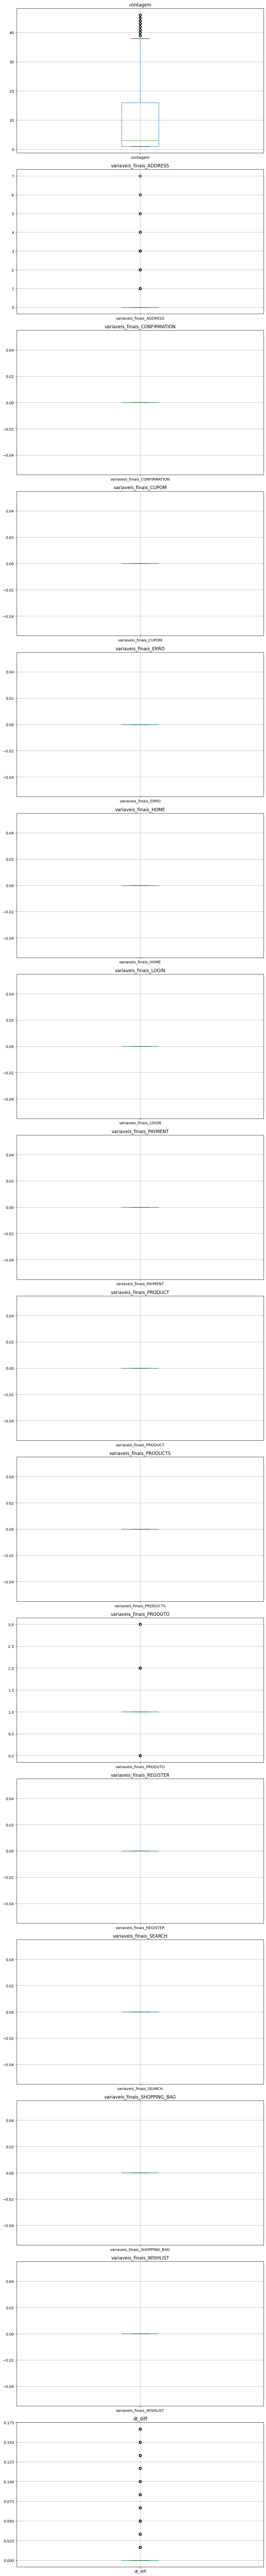

In [ ]:
import pandas as pd

# Supondo que 'dados' seja o seu DataFrame
# Filtrar colunas numéricas
dados=consumidor_final
dados_numericos = dados.select_dtypes(include=['float64', 'int64'])

# Removendo outliers
for coluna in dados_numericos.columns:
    Q1 = dados[coluna].quantile(0.25)
    Q3 = dados[coluna].quantile(0.75)
    IQR = Q3 - Q1
    filtro = (dados[coluna] >= Q1 - 1.5 * IQR) & (dados[coluna] <= Q3 + 1.5 * IQR)
    dados = dados.loc[filtro]

# Após remover outliers, você pode visualizar novamente com boxplots para verificar o resultado
plt.figure(figsize=(10, 6 * len(dados_numericos.columns)))
for i, coluna in enumerate(dados_numericos.columns):
    plt.subplot(len(dados_numericos.columns), 1, i + 1)
    dados.boxplot(column=coluna)
    plt.title(coluna)
    plt.tight_layout()

plt.show()

In [ ]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
centers = 5
X_train=X


In [ ]:
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=94)
X_train = StandardScaler().fit_transform(X_train)
X_train

array([[ 0.40907581,  1.24164646],
       [-0.27043666,  0.10891124],
       [-1.09413762, -1.71933642],
       [ 1.68799966,  0.24192163],
       [ 1.71054185,  1.17066453],
       [-1.09372859, -0.17004283],
       [-0.11477504,  1.15910343],
       [-0.77749688, -1.74083076],
       [ 0.03553168,  0.07496814],
       [-0.11048937, -0.03970577],
       [-0.50143726, -1.54415112],
       [ 0.28849114,  1.02321669],
       [-0.81644658, -1.00324604],
       [-0.91655084,  0.02936711],
       [ 0.3200251 ,  1.14279219],
       [ 1.58337191,  0.82249657],
       [ 1.29520788, -0.2271966 ],
       [ 0.28558099,  1.34056796],
       [-0.74220042, -1.24162816],
       [ 0.15337983,  1.19234752],
       [-0.71228608, -1.84960576],
       [-0.58633753, -1.40454894],
       [ 0.17062337,  1.51235671],
       [ 1.54740059,  0.32760317],
       [ 1.61069348,  0.52280019],
       [-0.79567834,  0.03995414],
       [ 0.71234271,  1.02276012],
       [-1.28953254,  0.34298907],
       [-1.68539045,

In [ ]:
dados_numericos = X_train

# Plotando os boxplots
plt.figure(figsize=(12, 8))  # Ajuste o tamanho conforme necessário
for i, coluna in enumerate(dados_numericos.columns):
    plt.subplot(len(dados_numericos.columns) // 3 + 1, 3, i + 1)  # Ajustando a quantidade de plots por linha
    X_train.boxplot(column=coluna)
    plt.title(coluna)
    plt.tight_layout()

plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 1200x800 with 0 Axes>

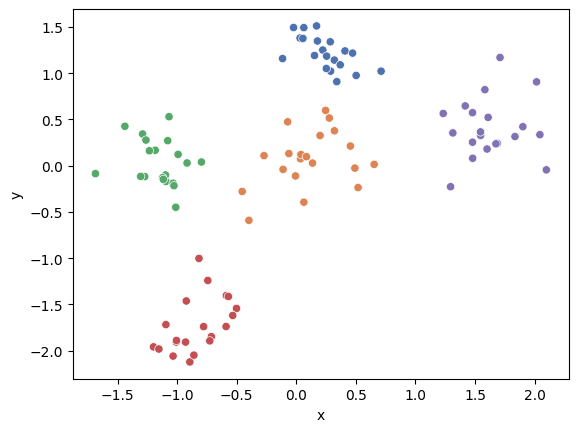

In [ ]:
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random",n_clusters=5,n_init=10,max_iter=300,random_state=94)

In [ ]:
kmeans.fit(X_train)

KMeans(init='random', n_clusters=5, n_init=10, random_state=94)

In [ ]:
kmeans.inertia_

12.408932635356926

In [ ]:
kmeans.cluster_centers_

array([[-1.15091693,  0.03232067],
       [ 1.62833769,  0.40264849],
       [ 0.24739833,  1.22081656],
       [-0.83249612, -1.72601122],
       [ 0.10767704,  0.0702255 ]])

In [ ]:
kmeans.labels_[:5]

array([2, 4, 3, 1, 1])

In [ ]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}
sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(X_train)
     sse.append(kmeans.inertia_)

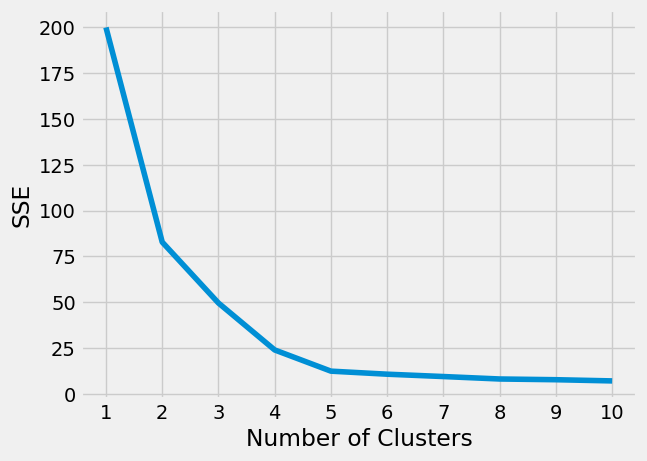

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
features=X_train
scaler = StandardScaler()
features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)
scaled_features = scaler.fit_transform(features)

In [ ]:
true_labels

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

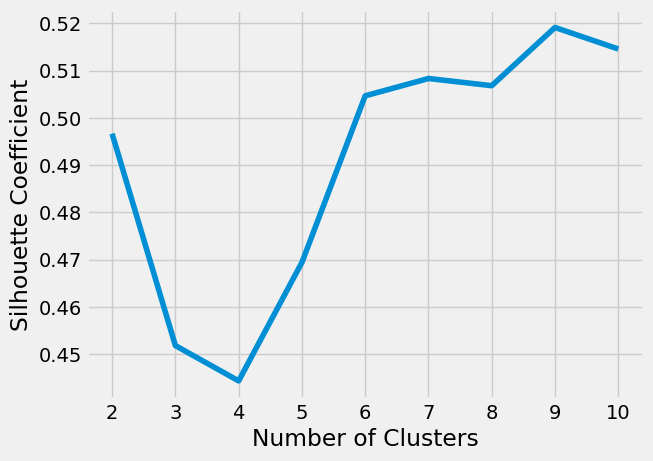

In [ ]:
 # A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
silhouette_coefficients

[0.49664368674348447,
 0.4517938857863906,
 0.44431240361513163,
 0.4693925271171766,
 0.5046620859763136,
 0.5083284203358455,
 0.5068049814405196,
 0.5191339495063518,
 0.5145701932771849]

In [ ]:
# Hierarchical clustering
# Spectral clustering

In [ ]:
kmeans = KMeans(n_clusters=4)
dbscan = DBSCAN(eps=0.5)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

u_labels = np.unique(true_labels)
u_labels


array([0, 1], dtype=int64)

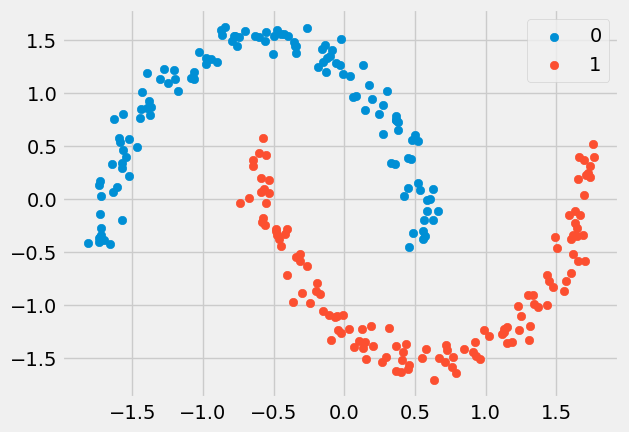

In [ ]:
#plotting the results:

for i in u_labels:
    plt.scatter(scaled_features[true_labels == i , 0] , scaled_features[true_labels == i , 1] , label = i)
plt.legend()
plt.show()

TypeError: Axes.scatter() missing 1 required positional argument: 'y'

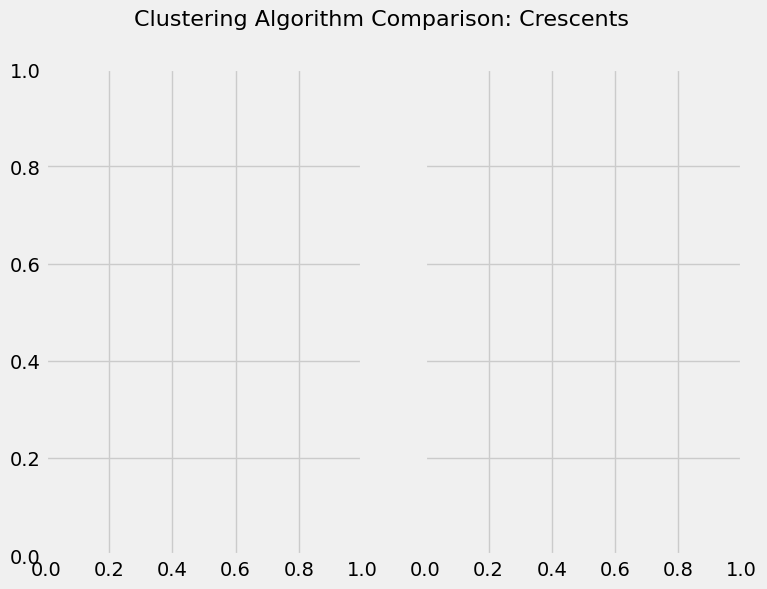

In [ ]:
 # Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
# The k-means plot
km_colors = [kmeans.labels_]
ax1.scatter(scaled_features , c=km_colors)
ax1.set_title(f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

# The dbscan plot
db_colors = [dbscan.labels_]
ax2.scatter(scaled_features, c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})
plt.show()

In [ ]:
categoricas = ['uf_entrega', 'created_at_order_periodo','target']

label_encoder = LabelEncoder()
df_one_hot=df
for i in categoricas:
    df_one_hot[i] = label_encoder.fit_transform(df[i])

df_one_hot

In [ ]:
columns=['qt_parcelas_pagamento', 'qt_itens', 'uf_entrega', 'created_at_order_weekday', 'vlr_total', 'vlr_desconto', 'vlr_frete', 'uf_dif_ddd', 'qtd_compras_consolidada', 'qtd_compras_realizadas_a_vista', 'qtd_compras_realizadas_cartao', 'avg_vlr_compras_realizadas', 'max_item_price', 'avg_item_price', 'qtd_ip_repetido', 'created_at_order_periodo']
columns_obj = {}
for index, column in enumerate(columns):
    
        columns_obj[index] = column
  
df_normalizacao = df_one_hot
scaler = StandardScaler().fit_transform(df_one_hot[columns])

df_normalizacao.drop(columns, axis=1, inplace=True)
df_normalizacao = pd.concat([df_normalizacao, pd.DataFrame(scaler)], axis=1)
df_normalizacao = df_normalizacao.rename(columns=columns_obj)

In [ ]:
df_normalizacao

In [ ]:
df_split = df_normalizacao

In [ ]:
y = df_split['target']
df_split.drop('target', axis=1, inplace=True)
x = df_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=94, stratify=y)

df_train = x_train.copy()
df_train["target"] = y_train

df_test = x_test.copy()
df_test["target"] = y_test

In [ ]:
sm = SMOTE(random_state=94)
x_train_balanced, y_train_balanced = sm.fit_resample(x_train, y_train)

In [ ]:
selector = PowerSHAP(model= CatBoostClassifier(iterations=100, verbose=0,task_type="CPU", eval_metric = "AUC"))

In [ ]:
selector.fit(x_train_balanced,y_train_balanced)

In [ ]:
powershap_out = selector._processed_shaps_df

In [ ]:
final_df =selector.transform(x_train_balanced)
final_df

In [ ]:
final_df.info()

In [ ]:
y_train_balanced.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
# class 1 
def objective(trial , X = final_df , y = y_train_balanced):
    train_x , test_x , train_y , test_y = train_test_split(X , y , \
            test_size = 0.3 , random_state = 42, stratify = y)    
    params = {
        'tol' : trial.suggest_uniform('tol' , 1e-6 , 1e-3),
        'C' : trial.suggest_loguniform("C", 1e-2, 1),
       'fit_intercept' : trial.suggest_categorical('fit_intercept' , [True, False]),
       #'random_state' : trial.suggest_categorical('random_state' , [0, 94, 1179, 42]),
       'solver' : trial.suggest_categorical('solver' , ['lbfgs','liblinear']),
        "n_jobs" : -1
    }
    model1 = LogisticRegression(**params, random_state = 2020)
    model1.fit(train_x , train_y)
    y_predlr1 = model1.predict_proba(test_x)[:,1]
    model2 = LogisticRegression(**params, random_state = 2021)
    model2.fit(train_x , train_y)
    y_predlr2 = model2.predict_proba(test_x)[:,1]
    y_predlr = (y_predlr1 + y_predlr2) / 2
    auc = roc_auc_score(test_y , y_predlr)
    return auc
optuna.logging.set_verbosity(optuna.logging.WARNING) # i do not want to see trail information
study = optuna.create_study(direction = 'maximize' , study_name = 'lr'
                            , pruner = optuna.pruners.HyperbandPruner() 
                           )
study.optimize(objective, n_trials = 100)
print('numbers of the finished trials:' , len(study.trials))
print('the best params:' , study.best_trial.params)
print('the best value:' , study.best_value)

In [ ]:
lr = LogisticRegression(**study.best_trial.params)
lr.fit(final_df, y_train_balanced)

In [ ]:
vars=final_df.columns.unique()
vars

In [ ]:
x_test=x_test[vars]
x_test.info()

In [ ]:
def metrics(model,x,y):
    y_pred=model.predict(x)
    print(classification_report(y,y_pred))
    ac = accuracy_score(y,y_pred)
    pr = precision_score(y,y_pred)
    rc = recall_score(y,y_pred)
    print('Accuracy: ', ac)
    print('Precision: ', pr)
    print('Recall: ', rc)
    print('AUC: ', roc_auc_score(y,y_pred))
    print('\n')
    
    matrix = confusion_matrix(y,y_pred)
    print(matrix)
    cm_matrix = pd.DataFrame(data=matrix)

    ax=sns.heatmap(cm_matrix,annot=True,fmt=".1f")
    ax.set(xlabel="", ylabel="")

In [ ]:
metrics(lr,x_test, y_test)

In [ ]:
from lightgbm import LGBMClassifier
def objective(trial,data=final_df,target=y_train_balanced,test_x=x_test,test_y=y_test):
    param = {
        "objective": "binary",
        "eval_metric ": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",   #gbdt,dart,rf            
        "seed": 94,
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-10, 100000),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-10, 100000),
        'num_leaves': trial.suggest_int('num_leaves', 2, 2**10),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1),
        'bagging_freq': trial.suggest_int('bagging_freq', 0, 10000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 10000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-10, 1, log=True)

    }
    clf = LGBMClassifier(**param)
    clf.fit(data, target)
    y_pred = clf.predict(x_test)
    auc = roc_auc_score(y_test, y_pred)
    
    return auc

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
clf = LGBMClassifier(**study.best_trial.params)
clf.fit(final_df, y_train_balanced)

In [ ]:
metrics(clf,x_test,y_test)